In [1]:
from datetime import timedelta
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm
from tqdm.contrib.concurrent import process_map

In [2]:
airports = [
    "KATL",
    "KCLT",
    "KDEN",
    "KDFW",
    "KJFK",
    "KMEM",
    "KMIA",
    "KORD",
    "KPHX",
    "KSEA",
]

In [3]:
!pwd
DATA_DIRECTORY = Path("./")

/home/charmichokshi4444/Data


In [4]:
df = pd.read_csv(DATA_DIRECTORY / "KATL_etd.csv")
print(len(df.index))

for airport in airports[1:]:
    this = pd.read_csv(DATA_DIRECTORY / f"{airport}_etd.csv")
    print(len(this.index), len(this.index)+len(df.index))
    
    df = df.append(this)
    
    print(len(df.index))

3194032
2133639 5327671
5327671
2848350 8176021
8176021
3091326 11267347
11267347
1236903 12504250
12504250
1185493 13689743
13689743
1404563 15094306
15094306
2933510 18027816
18027816
1689702 19717518
19717518
1647433 21364951
21364951


In [74]:
len(df.index)

2042723

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042723 entries, 0 to 157319
Data columns (total 5 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   gufi                             object
 1   timestamp                        object
 2   airport                          object
 3   minutes_until_pushback           int64 
 4   departure_runway_estimated_time  object
dtypes: int64(1), object(4)
memory usage: 93.5+ MB


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['departure_runway_estimated_time'] = pd.to_datetime(df['departure_runway_estimated_time'], errors='coerce')

In [9]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [10]:
df['etd_year'] = df['departure_runway_estimated_time'].dt.year
df['etd_month'] = df['departure_runway_estimated_time'].dt.month
df['etd_day'] = df['departure_runway_estimated_time'].dt.day
df['etd_hour'] = df['departure_runway_estimated_time'].dt.hour
df['etd_minute'] = df['departure_runway_estimated_time'].dt.minute
df['etd_second'] = df['departure_runway_estimated_time'].dt.second

In [11]:
df

,gufi,timestamp,airport,minutes_until_pushback,departure_runway_estimated_time,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
0,AAL1008.ATL.DFW.210403.1312.0051.TFM_TFDM,2021-04-03 19:30:00,KATL,114,2021-04-03 21:39:00,2021,4,3,19,30,0,2021,4,3,21,39,0
1,AAL794.ATL.MIA.210403.1407.0016.TFM_TFDM,2021-04-03 19:30:00,KATL,63,2021-04-03 21:00:00,2021,4,3,19,30,0,2021,4,3,21,0,0
2,ASH6024.ATL.IAH.210403.1906.0029.TMA,2021-04-03 19:30:00,KATL,68,2021-04-03 20:45:00,2021,4,3,19,30,0,2021,4,3,20,45,0
3,DAL1238.ATL.DFW.210403.1836.0037.TFM,2021-04-03 19:30:00,KATL,33,2021-04-03 19:57:00,2021,4,3,19,30,0,2021,4,3,19,57,0
4,DAL1280.ATL.PHL.210403.1845.0013.TFM,2021-04-03 19:30:00,KATL,6,2021-04-03 19:49:00,2021,4,3,19,30,0,2021,4,3,19,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647428,UAL541.SEA.DEN.210429.1215.0012.TFM,2021-04-30 11:00:00,KSEA,80,2021-04-30 12:34:00,2021,4,30,11,0,0,2021,4,30,12,34,0
1647429,UAL541.SEA.DEN.210501.1215.0025.TFM,2021-05-02 11:00:00,KSEA,93,2021-05-02 12:34:00,2021,5,2,11,0,0,2021,5,2,12,34,0
1647430,UAL541.SEA.DEN.210502.1215.0016.TFM,2021-05-03 11:00:00,KSEA,73,2021-05-03 12:34:00,2021,5,3,11,0,0,2021,5,3,12,34,0
1647431,UAL541.SEA.DEN.210504.1215.0069.TFM,2021-05-05 11:00:00,KSEA,202,2021-05-05 12:34:00,2021,5,5,11,0,0,2021,5,5,12,34,0


In [12]:
df = df.drop(['timestamp', 'departure_runway_estimated_time'], axis=1)
df

,gufi,airport,minutes_until_pushback,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
0,AAL1008.ATL.DFW.210403.1312.0051.TFM_TFDM,KATL,114,2021,4,3,19,30,0,2021,4,3,21,39,0
1,AAL794.ATL.MIA.210403.1407.0016.TFM_TFDM,KATL,63,2021,4,3,19,30,0,2021,4,3,21,0,0
2,ASH6024.ATL.IAH.210403.1906.0029.TMA,KATL,68,2021,4,3,19,30,0,2021,4,3,20,45,0
3,DAL1238.ATL.DFW.210403.1836.0037.TFM,KATL,33,2021,4,3,19,30,0,2021,4,3,19,57,0
4,DAL1280.ATL.PHL.210403.1845.0013.TFM,KATL,6,2021,4,3,19,30,0,2021,4,3,19,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647428,UAL541.SEA.DEN.210429.1215.0012.TFM,KSEA,80,2021,4,30,11,0,0,2021,4,30,12,34,0
1647429,UAL541.SEA.DEN.210501.1215.0025.TFM,KSEA,93,2021,5,2,11,0,0,2021,5,2,12,34,0
1647430,UAL541.SEA.DEN.210502.1215.0016.TFM,KSEA,73,2021,5,3,11,0,0,2021,5,3,12,34,0
1647431,UAL541.SEA.DEN.210504.1215.0069.TFM,KSEA,202,2021,5,5,11,0,0,2021,5,5,12,34,0


In [13]:
# df = df.drop(['etd_year', 'etd_month', 'etd_day', 'etd_hour', 'etd_minute', 'etd_second'], axis=1)
# df

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle

In [15]:
le = LabelEncoder()
df['gufi'] = le.fit_transform(df['gufi'])
df['airport'] = le.fit_transform(df['airport'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21364951 entries, 0 to 1647432
Data columns (total 15 columns):
 #   Column                  Dtype
---  ------                  -----
 0   gufi                    int64
 1   airport                 int64
 2   minutes_until_pushback  int64
 3   year                    int64
 4   month                   int64
 5   day                     int64
 6   hour                    int64
 7   minute                  int64
 8   second                  int64
 9   etd_year                int64
 10  etd_month               int64
 11  etd_day                 int64
 12  etd_hour                int64
 13  etd_minute              int64
 14  etd_second              int64
dtypes: int64(15)
memory usage: 2.5 GB


In [16]:
y = df['minutes_until_pushback']
y

0          114
1           63
2           68
3           33
4            6
          ... 
1647428     80
1647429     93
1647430     73
1647431    202
1647432    187
Name: minutes_until_pushback, Length: 21364951, dtype: int64

In [17]:
df = df.drop(['minutes_until_pushback'], axis=1)
df

,gufi,airport,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
0,3052,0,2021,4,3,19,30,0,2021,4,3,21,39,0
1,664983,0,2021,4,3,19,30,0,2021,4,3,21,0,0
2,900355,0,2021,4,3,19,30,0,2021,4,3,20,45,0
3,994210,0,2021,4,3,19,30,0,2021,4,3,19,57,0
4,1004935,0,2021,4,3,19,30,0,2021,4,3,19,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647428,3285588,9,2021,4,30,11,0,0,2021,4,30,12,34,0
1647429,3285590,9,2021,5,2,11,0,0,2021,5,2,12,34,0
1647430,3285591,9,2021,5,3,11,0,0,2021,5,3,12,34,0
1647431,3285593,9,2021,5,5,11,0,0,2021,5,5,12,34,0


In [18]:
# aaa = aa[:100000]
# yy = y[:100000]

In [19]:
# yy

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state = 5)

# X_train,X_test,y_train,y_test = train_test_split(aaa,yy,test_size=0.20,random_state = 5)

In [21]:
print(X_train.info(), X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14955465 entries, 1685201 to 239572
Data columns (total 14 columns):
 #   Column      Dtype
---  ------      -----
 0   gufi        int64
 1   airport     int64
 2   year        int64
 3   month       int64
 4   day         int64
 5   hour        int64
 6   minute      int64
 7   second      int64
 8   etd_year    int64
 9   etd_month   int64
 10  etd_day     int64
 11  etd_hour    int64
 12  etd_minute  int64
 13  etd_second  int64
dtypes: int64(14)
memory usage: 1.7 GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6409486 entries, 2561761 to 996309
Data columns (total 14 columns):
 #   Column      Dtype
---  ------      -----
 0   gufi        int64
 1   airport     int64
 2   year        int64
 3   month       int64
 4   day         int64
 5   hour        int64
 6   minute      int64
 7   second      int64
 8   etd_year    int64
 9   etd_month   int64
 10  etd_day     int64
 11  etd_hour    int64
 12  etd_minute  int64
 13  etd_se

In [22]:
X_test 

,gufi,airport,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
2561761,3298985,2,2020,12,13,0,45,0,2020,12,13,1,26,0
1909253,280266,1,2021,11,27,17,30,0,2021,11,27,19,9,0
614555,1363479,0,2022,1,7,21,30,0,2022,1,7,23,2,0
1164543,1032397,0,2022,7,16,11,45,0,2022,7,16,12,18,0
635341,357931,8,2020,12,11,16,45,0,2020,12,11,18,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278811,1297331,0,2021,11,3,10,30,0,2021,11,3,11,25,0
3016306,593428,3,2021,5,17,10,30,0,2021,5,17,12,15,0
504979,1382398,0,2022,9,17,14,0,0,2022,9,17,15,20,0
1114671,2804849,8,2021,11,6,1,45,0,2021,11,6,3,12,0


In [23]:
# sc1 = StandardScaler()
# X_train_sc = sc1.fit_transform(X_train)
# X_test_sc = sc1.transform(X_test)

In [24]:
# X_train_sc.shape

In [25]:
# Rfc = RandomForestRegressor(random_state=2, max_depth=4, n_estimators=5, warm_start=True, max_samples=0.7)
# 27

# Rfc = RandomForestRegressor(random_state=2, max_depth=7, n_estimators=7, warm_start=True, max_samples=0.8)
# 23.9

Rfc = RandomForestRegressor(random_state=2, max_depth=9, n_estimators=7, warm_start=True, max_samples=0.8)
# 21.65

# Rfc = RandomForestRegressor(random_state=2, n_estimators=20, warm_start=True, max_samples=0.8)
# 16 | 13.5
# Rfc = RandomForestRegressor(random_state=2, n_estimators=20, warm_start=True)
# 16
# Rfc = RandomForestRegressor(random_state=2, n_estimators=50, warm_start=True, max_samples=0.8)
# 16
# Rfc = RandomForestRegressor(random_state=2, n_estimators=10, warm_start=True, max_samples=0.8)
# 17

# fitResultR = Rfc.fit(X_train_sc, y_train)
# predictedValues = fitResultR.predict(X_test_sc)
# mae = mean_absolute_error(y_test, predictedValues)
# print ('MAE:' ,  mae)

fitResultR = Rfc.fit(X_train, y_train)
predictedValues = fitResultR.predict(X_test)
mae = mean_absolute_error(y_test, predictedValues)
print ('MAE:' ,  mae)

# print ('MSE:' , mean_squared_error(y_test, predictedValues))
# print('RMSE:' , np.sqrt(mean_squared_error(y_test, predictedValues)))
# print ('R2:' , r2_score(y_test, predictedValues))

with open('MAE.txt', 'w') as f:
    f.write(str(mae))

MAE: 21.658482620187044


NameError: name 'pickle' is not defined

In [26]:
fitResultR

RandomForestRegressor(max_depth=9, max_samples=0.8, n_estimators=7,
                      random_state=2, warm_start=True)

In [ ]:
filename = 'RFR_9708.sav'

In [28]:
# save the model to disk
pickle.dump(fitResultR, open(filename, 'wb'))

In [29]:
with open('predictedValues.txt', 'w') as f:
    for line in predictedValues:
        f.write(f"{line}\n")

# generating submission format 

In [6]:
import pickle 
# load the model from disk
filename = 'RFR_9708.sav'
model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)
model

RandomForestRegressor(max_depth=9, max_samples=0.8, n_estimators=7,
                      random_state=2, warm_start=True)

In [7]:
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map

In [8]:
submission_format = pd.read_csv(
    DATA_DIRECTORY / "submission_format.csv", parse_dates=["timestamp"]
)
submission_format

,gufi,timestamp,airport,minutes_until_pushback
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL,0
1,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:30:00,KATL,0
2,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:45:00,KATL,0
3,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:00:00,KATL,0
4,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:15:00,KATL,0
...,...,...,...,...
2042718,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 20:45:00,KSEA,0
2042719,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:00:00,KSEA,0
2042720,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:15:00,KSEA,0
2042721,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:30:00,KSEA,0


In [64]:
airport = airports[9]
airport

'KSEA'

In [65]:
airport_submission_format = submission_format.loc[submission_format.airport == airport]
airport_submission_format

,gufi,timestamp,airport,minutes_until_pushback
1885403,AAL1006.SEA.DFW.210827.1300.0052.TFM_TFDM,2021-08-28 00:00:00,KSEA,0
1885404,AAL1006.SEA.DFW.210827.1300.0052.TFM_TFDM,2021-08-28 00:15:00,KSEA,0
1885405,AAL1006.SEA.DFW.210827.1300.0052.TFM_TFDM,2021-08-28 00:30:00,KSEA,0
1885406,AAL1006.SEA.DFW.210827.1300.0052.TFM_TFDM,2021-08-28 00:45:00,KSEA,0
1885407,AAL1006.SEA.DFW.210829.0059.0001.TFM,2021-08-29 23:45:00,KSEA,0
...,...,...,...,...
2042718,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 20:45:00,KSEA,0
2042719,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:00:00,KSEA,0
2042720,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:15:00,KSEA,0
2042721,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:30:00,KSEA,0


In [66]:
etd = pd.read_csv(
    DATA_DIRECTORY / airport / f"{airport}_etd.csv.bz2",
    parse_dates=["departure_runway_estimated_time", "timestamp"],
).sort_values("timestamp")
etd

,gufi,timestamp,departure_runway_estimated_time
3002659,DAL1191.SEA.LAS.201030.2233.0063.TFM,2020-11-01 00:00:01,2020-10-31 22:43:00
3002662,QXE2254.SEA.PDX.201030.2338.0035.TFM,2020-11-01 00:00:09,2020-10-31 23:50:00
3002664,SKW3711.SEA.SFO.201030.2204.0001.TFM,2020-11-01 00:00:37,2020-10-31 22:21:00
3002667,DAL1128.SEA.SLC.201030.2359.0010.TFM,2020-11-01 00:00:47,2020-11-01 00:07:00
3002671,DAL1128.SEA.SLC.201030.2359.0010.TFM,2020-11-01 00:00:52,2020-11-01 00:07:00
...,...,...,...
2997034,QXE2157.SEA.PSC.221130.2345.0097.TFM,2022-12-01 23:59:30,2022-12-01 23:58:00
2997038,SKW3620.SEA.RDM.221130.2340.0067.TFM,2022-12-01 23:59:43,2022-12-02 00:24:00
2997039,DAL869.SEA.ATL.221130.2000.0236.TFM,2022-12-01 23:59:44,2022-12-01 20:55:00
2997040,ASA420.SEA.ONT.221201.0055.0151.TFM,2022-12-01 23:59:50,2022-12-02 01:06:00


In [67]:
def estimate_pushback(now: pd.Timestamp) -> pd.Series:

    # subset submission format to the current prediction time
    now_submission_format = airport_submission_format.loc[
        airport_submission_format.timestamp == now
    ].reset_index(drop=True)

    # filter features to 30 hours before prediction time to prediction time
    now_etd = etd.loc[(etd.timestamp > now - timedelta(hours=30)) & (etd.timestamp <= now)]

    # get the latest ETD for each flight
    latest_now_etd = now_etd.groupby("gufi").last().departure_runway_estimated_time

    # merge the latest ETD with the flights we are predicting
    departure_runway_estimated_time = now_submission_format.merge(
        latest_now_etd, how="left", on="gufi"
    ).departure_runway_estimated_time

    now_prediction = now_submission_format.copy()

    now_prediction["departure_runway_estimated_time"] = departure_runway_estimated_time

    return now_prediction

predictions = process_map(
    estimate_pushback,
    pd.to_datetime(airport_submission_format.timestamp.unique()),
    chunksize=20,
)

predictions = pd.concat(predictions, ignore_index=True)
predictions["departure_runway_estimated_time"] = predictions.departure_runway_estimated_time

predictions.info()

  0%|          | 0/4880 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157320 entries, 0 to 157319
Data columns (total 5 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   gufi                             157320 non-null  object        
 1   timestamp                        157320 non-null  datetime64[ns]
 2   airport                          157320 non-null  object        
 3   minutes_until_pushback           157320 non-null  int64         
 4   departure_runway_estimated_time  157320 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 6.0+ MB


In [68]:
predictions

,gufi,timestamp,airport,minutes_until_pushback,departure_runway_estimated_time
0,AAL1006.SEA.DFW.210827.1300.0052.TFM_TFDM,2021-08-28 00:00:00,KSEA,0,2021-08-28 01:29:00
1,ASA107.SEA.ANC.210827.2140.0020.TFM,2021-08-28 00:00:00,KSEA,0,2021-08-28 00:44:00
2,ASA1092.SEA.LAX.210827.2157.0001.TFM,2021-08-28 00:00:00,KSEA,0,2021-08-28 01:21:00
3,ASA1146.SEA.AUS.210827.2140.0044.TFM,2021-08-28 00:00:00,KSEA,0,2021-08-28 01:12:00
4,ASA123.SEA.FAI.210827.1442.0018.TFM,2021-08-28 00:00:00,KSEA,0,2021-08-28 01:20:00
...,...,...,...,...,...
157315,UAL2436.SEA.DEN.210211.1321.0008.TFM,2021-02-12 12:00:00,KSEA,0,2021-02-12 13:38:00
157316,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:00:00,KSEA,0,2021-02-14 13:38:00
157317,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:15:00,KSEA,0,2021-02-14 13:38:00
157318,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:30:00,KSEA,0,2021-02-14 13:38:00


In [69]:
predictions.to_csv('{}_val_etd.csv'.format(airport), index=False)

In [71]:
# merge them all

val_df = pd.read_csv(DATA_DIRECTORY / "KATL_val_etd.csv")
print(len(val_df.index))

for airport in airports[1:]:
    this = pd.read_csv(DATA_DIRECTORY / f"{airport}_val_etd.csv")
    print(len(this.index), len(this.index)+len(val_df.index))
    
    val_df = val_df.append(this)
    
    print(len(val_df.index))

303836
198963 502799
502799
281311 784110
784110
297171 1081281
1081281
99604 1180885
1180885
120957 1301842
1301842
125964 1427806
1427806
295604 1723410
1723410
161993 1885403
1885403
157320 2042723
2042723


In [72]:
val_df

,gufi,timestamp,airport,minutes_until_pushback,departure_runway_estimated_time
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 21:05:00
1,AAL2612.ATL.CLT.210607.1928.0090.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 19:41:00
2,AAL980.ATL.DFW.210607.1818.0105.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 21:15:00
3,ASH6294.ATL.IAH.210607.1953.0135.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 20:15:00
4,DAL1003.ATL.DAL.210607.2023.0087.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 20:32:00
...,...,...,...,...,...
157315,UAL2436.SEA.DEN.210211.1321.0008.TFM,2021-02-12 12:00:00,KSEA,0,2021-02-12 13:38:00
157316,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:00:00,KSEA,0,2021-02-14 13:38:00
157317,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:15:00,KSEA,0,2021-02-14 13:38:00
157318,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:30:00,KSEA,0,2021-02-14 13:38:00


In [77]:
val_df['timestamp'] = pd.to_datetime(val_df['timestamp'], errors='coerce')
val_df['departure_runway_estimated_time'] = pd.to_datetime(val_df['departure_runway_estimated_time'], errors='coerce')

In [78]:
df=val_df
df

,gufi,timestamp,airport,minutes_until_pushback,departure_runway_estimated_time
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 21:05:00
1,AAL2612.ATL.CLT.210607.1928.0090.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 19:41:00
2,AAL980.ATL.DFW.210607.1818.0105.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 21:15:00
3,ASH6294.ATL.IAH.210607.1953.0135.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 20:15:00
4,DAL1003.ATL.DAL.210607.2023.0087.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 20:32:00
...,...,...,...,...,...
157315,UAL2436.SEA.DEN.210211.1321.0008.TFM,2021-02-12 12:00:00,KSEA,0,2021-02-12 13:38:00
157316,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:00:00,KSEA,0,2021-02-14 13:38:00
157317,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:15:00,KSEA,0,2021-02-14 13:38:00
157318,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:30:00,KSEA,0,2021-02-14 13:38:00


In [79]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [80]:
df['etd_year'] = df['departure_runway_estimated_time'].dt.year
df['etd_month'] = df['departure_runway_estimated_time'].dt.month
df['etd_day'] = df['departure_runway_estimated_time'].dt.day
df['etd_hour'] = df['departure_runway_estimated_time'].dt.hour
df['etd_minute'] = df['departure_runway_estimated_time'].dt.minute
df['etd_second'] = df['departure_runway_estimated_time'].dt.second
df

,gufi,timestamp,airport,minutes_until_pushback,departure_runway_estimated_time,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 21:05:00,2021,6,8,19,15,0,2021,6,8,21,5,0
1,AAL2612.ATL.CLT.210607.1928.0090.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 19:41:00,2021,6,8,19,15,0,2021,6,8,19,41,0
2,AAL980.ATL.DFW.210607.1818.0105.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 21:15:00,2021,6,8,19,15,0,2021,6,8,21,15,0
3,ASH6294.ATL.IAH.210607.1953.0135.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 20:15:00,2021,6,8,19,15,0,2021,6,8,20,15,0
4,DAL1003.ATL.DAL.210607.2023.0087.TFM,2021-06-08 19:15:00,KATL,0,2021-06-08 20:32:00,2021,6,8,19,15,0,2021,6,8,20,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157315,UAL2436.SEA.DEN.210211.1321.0008.TFM,2021-02-12 12:00:00,KSEA,0,2021-02-12 13:38:00,2021,2,12,12,0,0,2021,2,12,13,38,0
157316,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:00:00,KSEA,0,2021-02-14 13:38:00,2021,2,14,12,0,0,2021,2,14,13,38,0
157317,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:15:00,KSEA,0,2021-02-14 13:38:00,2021,2,14,12,15,0,2021,2,14,13,38,0
157318,UAL2436.SEA.DEN.210213.1321.0001.TFM,2021-02-14 12:30:00,KSEA,0,2021-02-14 13:38:00,2021,2,14,12,30,0,2021,2,14,13,38,0


In [81]:
df = df.drop(['timestamp', 'departure_runway_estimated_time'], axis=1)
df

,gufi,airport,minutes_until_pushback,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,KATL,0,2021,6,8,19,15,0,2021,6,8,21,5,0
1,AAL2612.ATL.CLT.210607.1928.0090.TFM,KATL,0,2021,6,8,19,15,0,2021,6,8,19,41,0
2,AAL980.ATL.DFW.210607.1818.0105.TFM,KATL,0,2021,6,8,19,15,0,2021,6,8,21,15,0
3,ASH6294.ATL.IAH.210607.1953.0135.TFM,KATL,0,2021,6,8,19,15,0,2021,6,8,20,15,0
4,DAL1003.ATL.DAL.210607.2023.0087.TFM,KATL,0,2021,6,8,19,15,0,2021,6,8,20,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157315,UAL2436.SEA.DEN.210211.1321.0008.TFM,KSEA,0,2021,2,12,12,0,0,2021,2,12,13,38,0
157316,UAL2436.SEA.DEN.210213.1321.0001.TFM,KSEA,0,2021,2,14,12,0,0,2021,2,14,13,38,0
157317,UAL2436.SEA.DEN.210213.1321.0001.TFM,KSEA,0,2021,2,14,12,15,0,2021,2,14,13,38,0
157318,UAL2436.SEA.DEN.210213.1321.0001.TFM,KSEA,0,2021,2,14,12,30,0,2021,2,14,13,38,0


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle

In [83]:
le = LabelEncoder()
df['gufi'] = le.fit_transform(df['gufi'])
df['airport'] = le.fit_transform(df['airport'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042723 entries, 0 to 157319
Data columns (total 15 columns):
 #   Column                  Dtype
---  ------                  -----
 0   gufi                    int64
 1   airport                 int64
 2   minutes_until_pushback  int64
 3   year                    int64
 4   month                   int64
 5   day                     int64
 6   hour                    int64
 7   minute                  int64
 8   second                  int64
 9   etd_year                int64
 10  etd_month               int64
 11  etd_day                 int64
 12  etd_hour                int64
 13  etd_minute              int64
 14  etd_second              int64
dtypes: int64(15)
memory usage: 249.4 MB


In [85]:
df = df.drop(['minutes_until_pushback'], axis=1)
df

,gufi,airport,year,month,day,hour,minute,second,etd_year,etd_month,etd_day,etd_hour,etd_minute,etd_second
0,235,0,2021,6,8,19,15,0,2021,6,8,21,5,0
1,42003,0,2021,6,8,19,15,0,2021,6,8,19,41,0
2,68104,0,2021,6,8,19,15,0,2021,6,8,21,15,0
3,86247,0,2021,6,8,19,15,0,2021,6,8,20,15,0
4,90744,0,2021,6,8,19,15,0,2021,6,8,20,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157315,309403,9,2021,2,12,12,0,0,2021,2,12,13,38,0
157316,309405,9,2021,2,14,12,0,0,2021,2,14,13,38,0
157317,309405,9,2021,2,14,12,15,0,2021,2,14,13,38,0
157318,309405,9,2021,2,14,12,30,0,2021,2,14,13,38,0


In [86]:
model

RandomForestRegressor(max_depth=9, max_samples=0.8, n_estimators=7,
                      random_state=2, warm_start=True)

In [88]:
valpredictedValues = model.predict(df)

In [90]:
len(valpredictedValues)

2042723

In [92]:
type(valpredictedValues)

numpy.ndarray

In [93]:
val_pred = pd.DataFrame(valpredictedValues, columns = ['minutes_until_pushback'])

In [94]:
with pd.option_context("float_format", "{:.2f}".format):
    display(val_pred.minutes_until_pushback.describe())

count   2042723.00
mean         53.19
std          23.49
min          12.09
25%          47.82
50%          50.15
75%          57.17
max         236.61
Name: minutes_until_pushback, dtype: float64

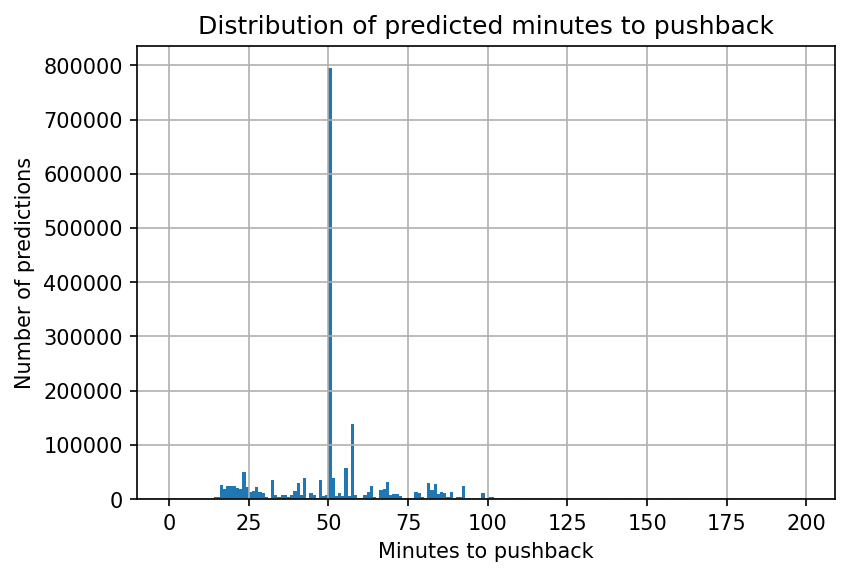

In [95]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
val_pred.minutes_until_pushback.clip(lower=0, upper=200).hist(bins=np.arange(0, 200), ax=ax)
ax.set_title("Distribution of predicted minutes to pushback")
ax.set_ylabel("Number of predictions")
ax.set_xlabel("Minutes to pushback")
_ = plt.show()

In [98]:
val_pred

,minutes_until_pushback
0,104.211056
1,19.201102
2,130.676773
3,52.128747
4,77.026848
...,...
2042718,50.149594
2042719,50.149594
2042720,50.149594
2042721,50.149594


In [99]:
val_pred['minutes_until_pushback'] = val_pred['minutes_until_pushback'].astype(int)

In [105]:
val_pred

,minutes_until_pushback
0,104
1,19
2,130
3,52
4,77
...,...
2042718,50
2042719,50
2042720,50
2042721,50


In [103]:
submission_format = submission_format.drop(['minutes_until_pushback'], axis=1)
submission_format

,gufi,timestamp,airport
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL
1,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:30:00,KATL
2,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:45:00,KATL
3,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:00:00,KATL
4,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:15:00,KATL
...,...,...,...
2042718,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 20:45:00,KSEA
2042719,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:00:00,KSEA
2042720,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:15:00,KSEA
2042721,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:30:00,KSEA


In [109]:
# final = pd.concat([submission_format, val_pred], ignore_index=True, sort=False)
a = pd.concat([submission_format, val_pred], axis=1)



In [110]:
a

,gufi,timestamp,airport,minutes_until_pushback
0,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:15:00,KATL,104
1,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:30:00,KATL,19
2,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 19:45:00,KATL,130
3,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:00:00,KATL,52
4,AAL1008.ATL.DFW.210607.2033.0110.TFM,2021-06-08 20:15:00,KATL,77
...,...,...,...,...
2042718,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 20:45:00,KSEA,50
2042719,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:00:00,KSEA,50
2042720,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:15:00,KSEA,50
2042721,XOJ760.SEA.SJC.210606.0435.0007.TFM,2021-06-06 21:30:00,KSEA,50


In [111]:
a.to_csv("validation_predictions_RFR_9708.zip", index=False)